# Próximo HIT Spotify

## Importando as bibliotecas

Aqui é importado as bibliotecas necessárias para a executação do notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

## Carregando o Dataset
Carrega o CSV para criar um dataframe.

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Análise e Exploração dos dados

Nesta etapa, serão realizadas as seguintes atividades:
- **Informações gerais**: Coleta e apresentação de informações básicas sobre o conjunto de dados.
- **Identificação das colunas numéricas e categóricas**: Classificação das variáveis do conjunto de dados em numéricas e categóricas, além das principais características das variáveis.

In [3]:
train_data.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [4]:
test_data.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,42819,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,59311,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,91368,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,61000,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


## Visualização e exploração de dados

Aqui, será abordado as técnicas utilizados para a visualização e exploração inicial dos dados. Através disso, é possível obter uma compreensão prévia da estrutura e das características do conjunto de dados.

* As colunas do DataFrame são dividias em categóricas e numéricas para análise e tratamento.
* Então primeiro é preciso identificar as colunas categóricas e numéricas, isso será feito nas primeira linha do código e por fim nas últimas duas colunas exibiremos a quantidade e os nomes das colunas.

Com o método `.info()` é possível obter informações detalhadas sobre o DataFrame. Especificamente, ele permite analisar os tipos de variáveis presentes no conjunto de dados.

Utilizando o comando `shape` abaixo, se observa que há 79800 linhas e 21 colunas a serem tratadas.

In [5]:
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

(79800, 21)

O método `.describe()` é utilizado para fornecer um resumo estatísticodas variáveis numéricas. Ao utilizar este comando, obtemos informações como a média, desvio padrão, valores mínimo e máximo, além dos quartis. Com esses dados é possível entender a distribuição e a variabilidade dos dados, ajudando a identificar padrões, valores nulos e *outliers*.

In [6]:
train_data.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


In [7]:
test_data.info()
test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34200 entries, 0 to 34199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_unique_id   34200 non-null  int64  
 1   track_id          34200 non-null  object 
 2   artists           34199 non-null  object 
 3   album_name        34199 non-null  object 
 4   track_name        34199 non-null  object 
 5   duration_ms       34200 non-null  int64  
 6   explicit          34200 non-null  bool   
 7   danceability      34200 non-null  float64
 8   energy            34200 non-null  float64
 9   key               34200 non-null  int64  
 10  loudness          34200 non-null  float64
 11  mode              34200 non-null  int64  
 12  speechiness       34200 non-null  float64
 13  acousticness      34200 non-null  float64
 14  instrumentalness  34200 non-null  float64
 15  liveness          34200 non-null  float64
 16  valence           34200 non-null  float6

(34200, 20)

In [8]:
test_data.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,34200.000000,3.420000e+04,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000,34200.000000
mean,56670.513889,2.283254e+05,0.565591,0.641041,5.314035,-8.247806,0.637135,0.084423,0.314750,0.153087,0.214113,0.473605,122.314152,3.907485
std,32710.184506,1.123471e+05,0.174544,0.251737,3.554899,5.014973,0.480834,0.105910,0.332552,0.306634,0.191084,0.259849,30.062414,0.428702
min,3.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28612.500000,1.733250e+05,0.455000,0.472000,2.000000,-10.039000,0.000000,0.035800,0.016600,0.000000,0.098200,0.256000,99.537500,4.000000
50%,56475.500000,2.131775e+05,0.579000,0.683000,5.000000,-6.984000,1.000000,0.048700,0.168500,0.000043,0.133000,0.463000,122.052500,4.000000
75%,84855.750000,2.616720e+05,0.693000,0.853000,8.000000,-5.011000,1.000000,0.084700,0.597000,0.045800,0.273000,0.682000,140.204000,4.000000
max,113999.000000,4.730302e+06,0.980000,1.000000,11.000000,1.795000,1.000000,0.963000,0.996000,1.000000,1.000000,0.992000,243.372000,5.000000


## Valores Nulos

É feita a verificação de valores nulos no DataFrame utilizando o método `isnull().sum()`. Ele permite contar a quantidade de valores NaN em cada coluna, facilitando a identificação de colunas que necessitam de tratamento para lidar com dados ausentes.


In [9]:
train_data.isnull().sum()

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64

In [10]:
test_data.isnull().sum()

track_unique_id     0
track_id            0
artists             1
album_name          1
track_name          1
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Após analisar que posssuia linhas com valores nulos, é feita a remoção delas.

In [11]:
test_data.fillna(0, inplace=True)

In [12]:
# Identifica linhas duplicadas
train_data[train_data.duplicated(keep='first')]

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target


In [13]:
# Identifica linhas duplicadas
test_data[test_data.duplicated(keep='first')]

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


## Identificação e Seleção de Colunas

É realizado a identificação das colunas presentes no dataset, classificando-as em numéricas e categóricas.

In [14]:
#Coloca em uma variável todas as colunas que tem dados do tipo categórico
colunas_categoricas = train_data.select_dtypes(include='object').columns
#Coloca em uma variável todas as colunas que train_data do tipo numérico
colunas_numericas = train_data.drop(colunas_categoricas, axis=1).columns

# Imprime a lista de colunas categóricas
print(f'Há {len(colunas_categoricas)} Colunas Categóricas: {list(colunas_categoricas)}')

# Imprime a lista de colunas numéricas
print(f'Há {len(colunas_numericas)} Colunas Numéricas: {list(colunas_numericas)}')

Há 5 Colunas Categóricas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
Há 16 Colunas Numéricas: ['track_unique_id', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity_target']


In [15]:
#Coloca em uma variável todas as colunas que tem dados do tipo categórico
colunas_categoricas = test_data.select_dtypes(include='object').columns
#Coloca em uma variável todas as colunas que test_data do tipo numérico
colunas_numericas = test_data.drop(colunas_categoricas, axis=1).columns

# Imprime a lista de colunas categóricas
print(f'Há {len(colunas_categoricas)} Colunas Categóricas: {list(colunas_categoricas)}')

# Imprime a lista de colunas numéricas
print(f'Há {len(colunas_numericas)} Colunas Numéricas: {list(colunas_numericas)}')

Há 5 Colunas Categóricas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
Há 15 Colunas Numéricas: ['track_unique_id', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


## Análise de Gráficos

### Gráfico 1: Distribuição de Popularidade

Neste gráfico é possível observar a distribuição da popularidade entre as músicas.

<Figure size 1200x600 with 0 Axes>

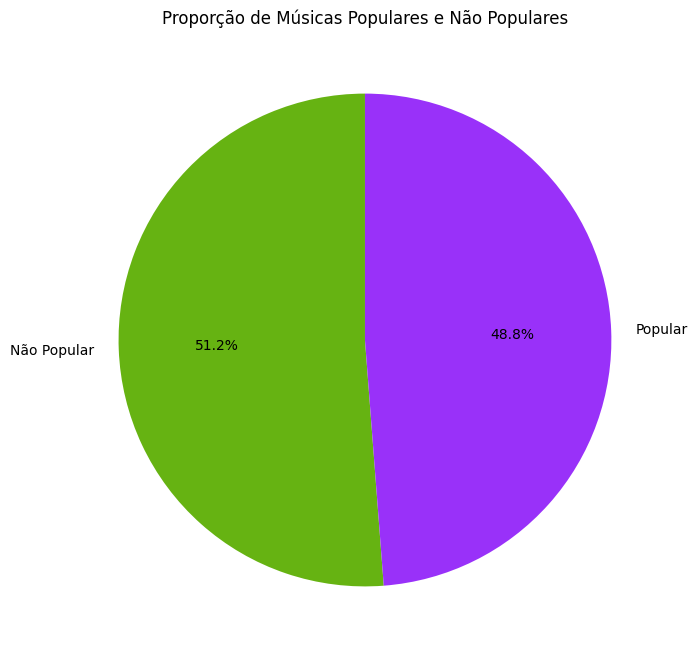

In [16]:
# Configura o tamanho padrão dos gráficos
plt.figure(figsize=(12, 6))

# Analisa a distribuição da variável alvo (popularity_target)
plt.figure(figsize=(8, 8))
popularity_counts = train_data['popularity_target'].value_counts()
plt.pie(popularity_counts, labels=['Não Popular', 'Popular'], autopct='%1.1f%%', startangle=90, colors=['#66b312','#9931f9'])
plt.title('Proporção de Músicas Populares e Não Populares')
plt.show()


### Gráfico 2: Distribuição da Energia das Músicas
Mostra a variação da energia das músicas, com a maioria delas se concentrando entre valores médios e altos de energia.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


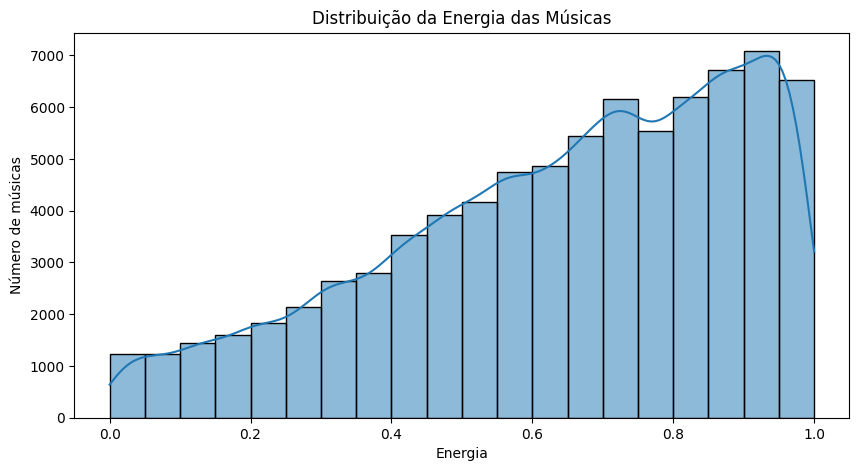

In [17]:
# Distribuição de 'energy' (energia) para ver como essa variável está distribuída
plt.figure(figsize=(10, 5))
sns.histplot(train_data['energy'], bins=20, kde=True)
plt.title('Distribuição da Energia das Músicas')
plt.xlabel('Energia') 
plt.ylabel('Número de músicas') # Quantidade de músicas
plt.show()


### Gráfico 3: Variação entre Danceabilidade e Valência
Mostra a relação entre a "dançabilidade" e a "valência" (emocionalidade positiva) das músicas.

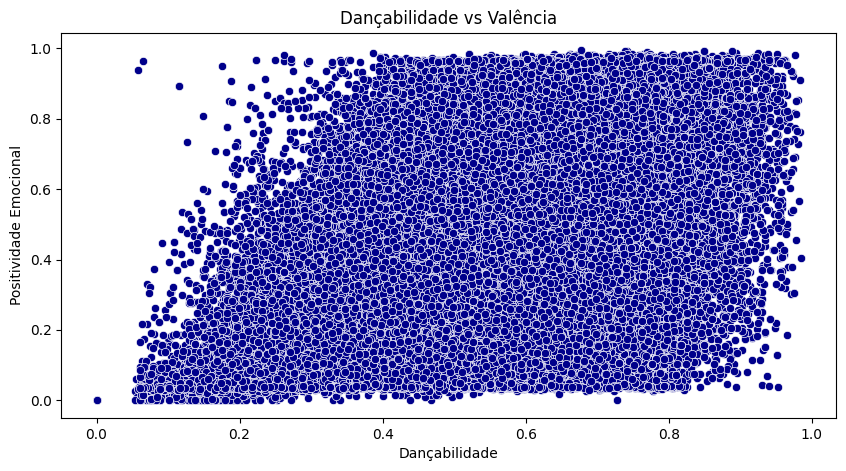

In [18]:
# Gráfico de dispersão entre 'danceability' (dançabilidade) e 'valence' (positividade emocional)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='danceability', y='valence', data=train_data, color='darkblue')
plt.title('Dançabilidade vs Valência')
plt.xlabel('Dançabilidade') # Dançabilidade
plt.ylabel('Positividade Emocional') # Positividade emocional
plt.show()


## Identificação de Outliers

Nessa seção foi feita a identificação e tratamento de outliers. Outliers são valores que se distanciam significativamente do restante dos dados, podendo distorcer análises e influenciar negativamente o desempenho do modelos preditivos.

In [19]:
# Função para identificar outliers
for column in train_data.select_dtypes(include=['number']).columns:
    def identificar_outliers_iqr(coluna):
      Q1 = coluna.quantile(0.25)
      Q3 = coluna.quantile(0.75)
      IQR = Q3 - Q1
      limite_inferior = Q1 - 1.5 * IQR
      limite_superior = Q3 + 1.5 * IQR
      return (coluna < limite_inferior) | (coluna > limite_superior)

# Aplica a função apenas nas colunas numéricas
outliers = train_data.select_dtypes(include=[np.number]).apply(identificar_outliers_iqr)

# Conta a quantidade de outliers por coluna
quantidade_outliers = outliers.sum()

# Imprime o resultado
print(quantidade_outliers)

track_unique_id          0
duration_ms           3990
danceability           420
energy                   0
key                      0
loudness              4351
mode                     0
speechiness           9277
acousticness             0
instrumentalness     17645
liveness              6032
valence                  0
tempo                  424
time_signature        8598
popularity_target        0
dtype: int64


Aqui foi feito a visualização através de boxplots para identificar outliers nas colunas numéricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

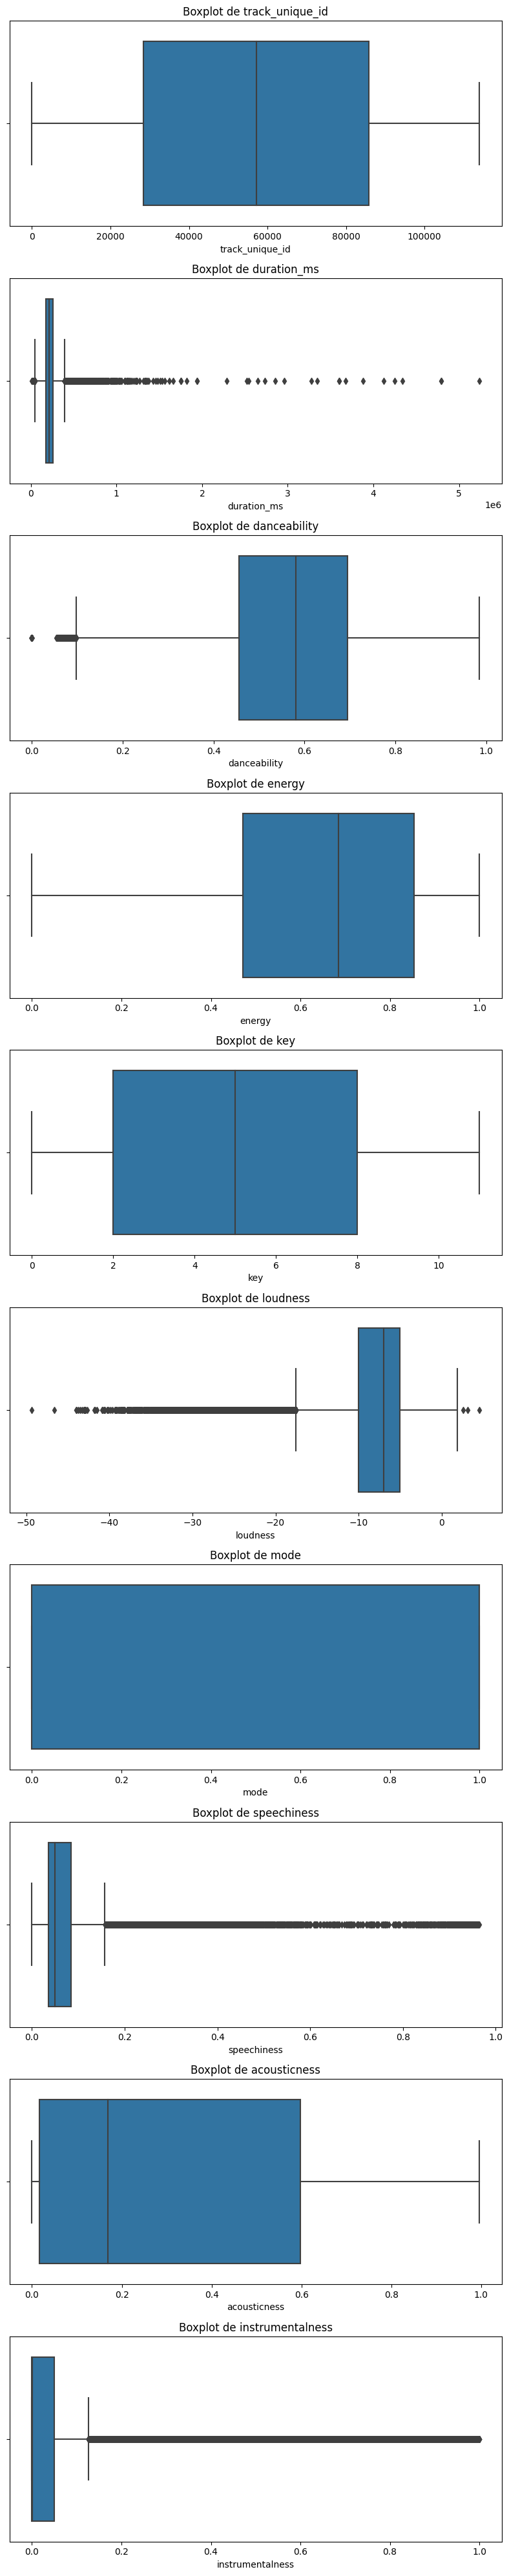

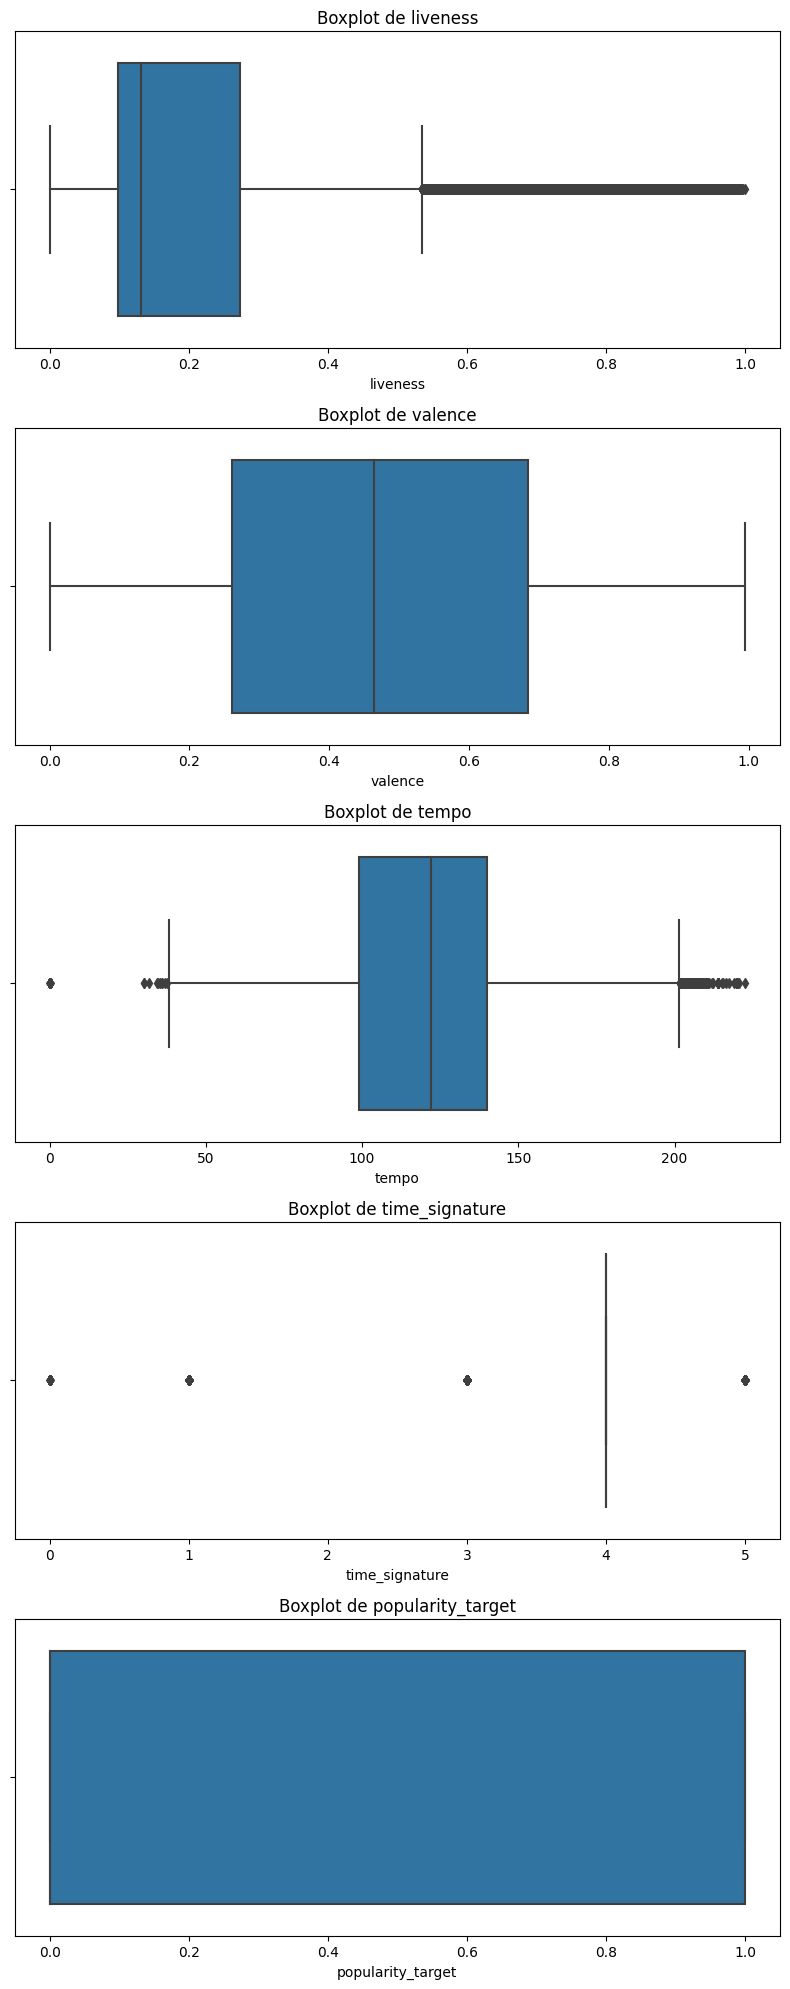

In [20]:
# Função para plotar boxplots com outliers
def plot_boxplots_with_outliers(dados, max_plots_per_fig=10):
    # Filtra colunas numéricas dos dados
    numeric_cols = dados.select_dtypes(include=['number']).columns
    # Número de figuras necessárias pra plotar as colunas
    num_figures = int(np.ceil(len(numeric_cols) / max_plots_per_fig))
    for fig_idx in range(num_figures):
        start_idx = fig_idx * max_plots_per_fig
        end_idx = start_idx + max_plots_per_fig
        cols_to_plot = numeric_cols[start_idx:end_idx]
        fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(8, len(cols_to_plot) * 4))
        
        # Se tiver só uma coluna, não gera a lista
        if len(cols_to_plot) == 1:
            axes = [axes]
        for ax, col in zip(axes, cols_to_plot):
            try:
                sns.boxplot(x=dados[col], ax=ax)
                ax.set_title(f'Boxplot de {col}')
                ax.set_xlabel(col)
            except ValueError as e:
                print(f"Erro ao criar boxplot para a coluna '{col}': {e}")
        plt.tight_layout()
        plt.show()
        
# Informações de diagnóstico
print(train_data.info())
print(train_data.head())

# Plota os boxplots
plot_boxplots_with_outliers(train_data)


O tratamento foi feito baseado na utilização de Interquartir(IQR) para a remoção dos outliers.

In [21]:
# Função para remover outliers usando IQR
def remover_outliers_iqr(dados):
    for coluna in dados.select_dtypes(include=[np.number]).columns:
        Q1 = dados[coluna].quantile(0.25)
        Q3 = dados[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        # Mantém apenas os dados que estão dentro dos limites
        dados = dados[(dados[coluna] >= limite_inferior) & (dados[coluna] <= limite_superior)]
    return dados

# Remove outliers do conjunto de dados
train_data = remover_outliers_iqr(train_data)

# Verifica o tamanho do novo conjunto de dados após a remoção dos outliers
train_data.shape


(41823, 21)

## Hipóteses

### Hipótese 1: Músicas com maior nível de energia tendem a ser mais populares.
Músicas com alta energia costumam ser mais animadas, características frequentemente associadas a músicas populares, especialmente em gêneros como pop e eletrônico.

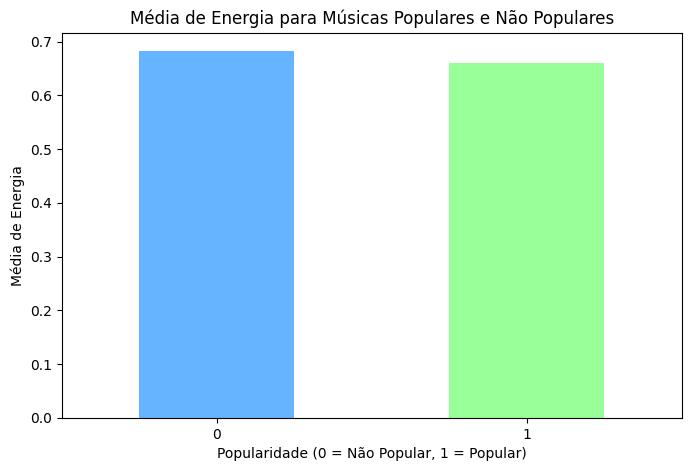

In [22]:
# Calcula a média de energia para cada classe de popularidade
energy_mean_by_popularity = train_data.groupby('popularity_target')['energy'].mean()

# Cria gráfico de barras para a média de energia
plt.figure(figsize=(8, 5))
energy_mean_by_popularity.plot(kind='bar', color=['#66b3ff', '#99ff99'])
plt.title('Média de Energia para Músicas Populares e Não Populares')
plt.xlabel('Popularidade (0 = Não Popular, 1 = Popular)')
plt.ylabel('Média de Energia')
plt.xticks(rotation=0)
plt.show()


#### O gráfico, ao contrário do que pensava, mostra que não depende somente de energia para ser popular.

### Hipótese 2: Músicas com alta "danceability" (dançabilidade) têm maior chance de serem populares.
Músicas dançantes são frequentemente tocadas em festas e eventos, o que pode impulsionar sua popularidade no Spotify, especialmente entre jovens.

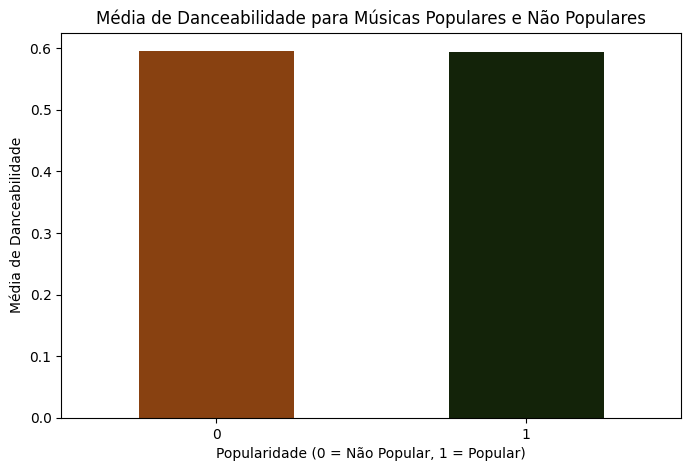

In [23]:
# Calcula a média de danceabilidade para cada classe de popularidade
danceability_mean_by_popularity = train_data.groupby('popularity_target')['danceability'].mean()

# Cria gráfico de barras para a média de danceabilidade
plt.figure(figsize=(8, 5))
danceability_mean_by_popularity.plot(kind='bar', color=['#884111', '#132309'])
plt.title('Média de Danceabilidade para Músicas Populares e Não Populares')
plt.xlabel('Popularidade (0 = Não Popular, 1 = Popular)')
plt.ylabel('Média de Danceabilidade')
plt.xticks(rotation=0)

plt.show()


#### É possível entender dessa hipótese que existe um padrão de média da dançabilidade entre as músicas não populares e populares.

### Hipótese 3: Músicas de gêneros específicos, como pop e eletrônico, são mais propensas a serem populares do que músicas de gêneros de nicho, como jazz ou clássica.
Gêneros populares tendem a ter maior audiência em plataformas de streaming como o Spotify, o que aumenta a probabilidade de uma música nesses gêneros alcançar um público maior.

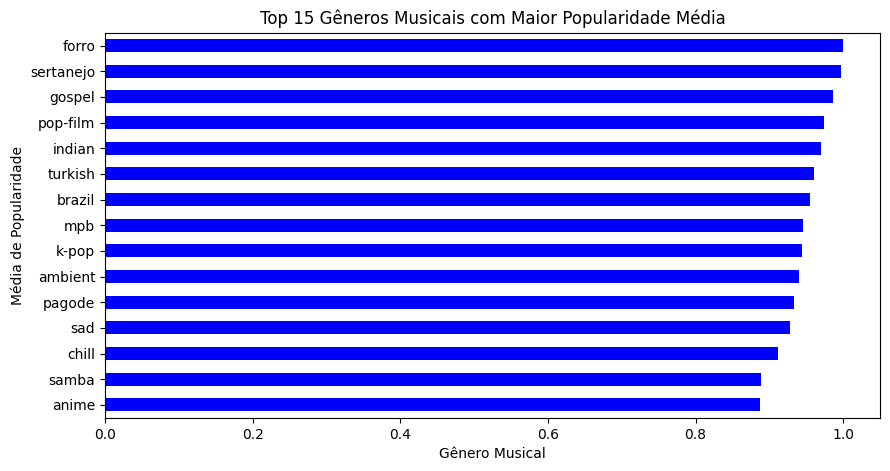

In [24]:
# Limita o gráfico para mostrar apenas os 15 gêneros mais populares
track_genre = train_data.groupby('track_genre')['popularity_target'].mean().sort_values(ascending=False).head(15)

# Cria o gráfico de barras com os gêneros mais populares
plt.figure(figsize=(10, 5))
track_genre.plot(kind='barh', color='blue')
plt.title('Top 15 Gêneros Musicais com Maior Popularidade Média')
plt.xlabel('Gênero Musical')
plt.ylabel('Média de Popularidade')
plt.xticks(rotation=0)
plt.gca().invert_yaxis()  # Inverte o eixo y para que o gênero mais importante apareça no topo
plt.show()

#### A partir do gráfico, conseguimos observar que gêneros musicais que são mais regionais, como forró e sertanejo (populares no interior do Brasil), além de gêneros específicos de determinadas regiões do mundo, como música indiana e turca, tendem a ter maior popularidade em suas respectivas áreas.

## Codificação de variáveis categóricas

Aqui é feito a codificação da variável `track_name` e `track_genre` para o formato numérico, permitindo o modelo interpretar os nomes das músicas como entradas válidas.

In [25]:
# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Codifica os nomes das músicas
train_data['track_name_encoded'] = label_encoder.fit_transform(train_data['track_name'])

# Exclui as colunas originais dos nomes das músicas
train_data = train_data.drop(columns=['track_name'])

# Ordena as colunas codificadas em ordem crescente
train_data = train_data.sort_values(by=['track_name_encoded']).reset_index(drop=True)

train_data.head(10)

,track_unique_id,track_id,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target,track_name_encoded
0,92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,151680,False,0.615,0.375,0,-10.362,...,0.0319,0.482000,0.000000,0.1110,0.922,110.720,4,rockabilly,1,0
1,66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,86675,False,0.664,0.611,3,-8.687,...,0.0886,0.120000,0.000000,0.0408,0.758,118.443,4,kids,0,1
2,82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,180706,False,0.565,0.977,11,-3.592,...,0.0546,0.028200,0.001320,0.4330,0.387,106.478,4,power-pop,0,2
3,93895,5OiONTndVC5YOMXg6VC5xs,Nikolay Kopylov,Popular Opera Arias,111800,False,0.443,0.514,10,-8.068,...,0.0924,0.988000,0.001870,0.0918,0.244,100.752,4,romance,0,3
4,98336,5ezuHIXXlsPQY4rbsSKT1W,Laura Osnes,Rodgers + Hammerstein's Cinderella (Original B...,90706,False,0.334,0.255,2,-12.120,...,0.0531,0.895000,0.000000,0.1250,0.123,78.200,4,show-tunes,0,4
5,129,6XrNrp7UtGgyZcHJ0ckL0w,Rachael Yamagata,Something In the Rain (Music from the Original...,296862,False,0.422,0.272,4,-10.772,...,0.0353,0.496000,0.000011,0.0704,0.113,143.413,4,acoustic,1,5
6,49289,5oIxZbtO8ctpXy8MTflBIf,Imperial;JOVANA K,Harder Stylez: We Love The Bass,157500,True,0.586,0.963,7,-1.941,...,0.0925,0.028300,0.000000,0.4090,0.308,100.003,4,hardstyle,0,6
7,49294,5uotAmqGJfrxEfANdTcBQ2,Imperial;Irradiate,Harder Stylez: We Love The Bass,212400,True,0.607,0.877,1,-3.409,...,0.0610,0.090300,0.000000,0.3680,0.162,99.987,4,hardstyle,0,7
8,32103,6HMk2bFT4VkIWwIAmDCqHj,Poshlaya Molly;HOFMANNITA,#HABIBATI,153005,True,0.717,0.799,1,-6.937,...,0.0465,0.001630,0.000000,0.3520,0.682,114.974,4,electronic,1,8
9,85565,1F2oJSb3FVLG6onX8U9rMX,Endank Soekamti;CJR,KOLABORASOE,264200,False,0.715,0.799,2,-5.386,...,0.0529,0.000028,0.000000,0.2360,0.676,95.004,4,punk-rock,1,9


In [26]:
# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Codifica a coluna 'genre'
label_encoder = LabelEncoder()
train_data['genre_encoded'] = label_encoder.fit_transform(train_data['track_genre'])

# Exclui as colunas originais dos gêneros das músicas
train_data = train_data.drop(columns=['track_genre'])

# Ordena as colunas codificadas em ordem crescente
train_data = train_data.sort_values(by=['genre_encoded']).reset_index(drop=True)

train_data.head(10)

,track_unique_id,track_id,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target,track_name_encoded,genre_encoded
0,359,7vg5fesQdq5I7Z7XGdyJd5,Roses & Frey,Bad Liar,226877,False,0.596,0.195,7,-11.020,...,0.0264,0.92600,0.000000,0.1390,0.176,82.114,4,1,2028,0
1,50,72xTsTouZ5nBmASX8k1XCW,Highland Peak,Trampoline (Acoustic),213098,False,0.596,0.200,0,-10.424,...,0.0305,0.91000,0.000183,0.0884,0.308,107.893,4,1,22304,0
2,556,5YRDGgdOshUPA17m7yzY7p,Masayoshi Yamazaki,HOME,330200,False,0.550,0.408,11,-8.404,...,0.0318,0.71900,0.000000,0.1100,0.331,129.152,4,1,16056,0
3,203,7BRwh1bemr9rFMDeTbcy5S,Kina Grannis,Creep,234135,False,0.585,0.103,7,-12.682,...,0.0309,0.80100,0.000000,0.1260,0.179,133.057,4,1,4531,0
4,822,59eluCMn0XbOWqeWQ91FTM,Aimyon,青春のエキサイトメント,246306,False,0.524,0.687,7,-4.039,...,0.0267,0.00135,0.000000,0.1690,0.619,99.919,4,1,26437,0
5,509,0MY3K86lZ9HIat4oBi40dh,Daniel Robinson,Here With Me (Acoustic),164478,False,0.689,0.299,7,-9.431,...,0.0301,0.83300,0.000000,0.1150,0.520,96.825,4,1,9097,0
6,623,2NLu5wwfHlB4rGTxDYCRk7,Boyce Avenue,"Cover Sessions, Vol. 6",197170,False,0.460,0.195,10,-12.093,...,0.0459,0.86700,0.000017,0.1120,0.384,176.119,4,1,13778,0
7,361,2TRXV6DoQLjdRrBR6ED6NP,Us The Duo,Slow Down Time,196920,False,0.733,0.657,2,-6.843,...,0.0272,0.01300,0.000067,0.3170,0.433,109.954,4,1,19672,0
8,269,2gBYjMXW65daBB1elr68JK,Canyon City,OK,212400,False,0.489,0.183,0,-14.769,...,0.0330,0.90700,0.000039,0.1060,0.486,79.961,4,1,15744,0
9,425,0voYwjeuMfvXlF76oesZKu,Joshua Radin,"Here, Right Now",183213,False,0.496,0.391,10,-9.844,...,0.0311,0.82600,0.012600,0.1080,0.492,108.868,4,1,9107,0


### Codificação das variáveis categóricas `test.csv`

In [27]:
# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Converte todos os valores de 'track_name' para string
test_data['track_name'] = test_data['track_name'].astype(str)

# Codifica os nomes das músicas
test_data['track_name_encoded'] = label_encoder.fit_transform(test_data['track_name'])

# Exclui as colunas originais dos nomes das músicas
test_data = test_data.drop(columns=['track_name'])

# Ordena as colunas codificadas em ordem crescente
test_data = test_data.sort_values(by=['track_name_encoded']).reset_index(drop=True)

test_data.head(10)

,track_unique_id,track_id,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_name_encoded
0,36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,178533,True,0.823,0.61200,1,-7.767,1,0.2480,0.168000,0.000000,0.1090,0.6880,142.959,4,french,0
1,66970,1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,84305,False,0.553,0.81200,3,-5.542,1,0.0558,0.132000,0.000010,0.0794,0.8710,118.368,4,kids,1
2,101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,289133,False,0.111,0.05680,10,-28.053,1,0.0551,0.990000,0.697000,0.1100,0.0395,169.401,1,sleep,2
3,93397,3KKk48f33mlB56F5L5nbJk,Nikolay Kopylov,Popular Opera Arias,235547,False,0.167,0.33200,1,-9.888,1,0.0359,0.992000,0.191000,0.1130,0.0527,62.970,4,romance,3
4,79999,4gHZlq1u5m89HP96BT3QHk,Dave Brubeck,A Dave Brubeck Christmas,179400,False,0.444,0.00402,2,-35.904,0,0.0750,0.996000,0.908000,0.0599,0.0385,90.026,0,piano,4
5,98295,0VXg0YYguSikxQCZSELGdX,Laura Osnes;Victoria Clark,Rodgers + Hammerstein's Cinderella (Original B...,219586,False,0.600,0.28800,5,-12.116,0,0.2060,0.910000,0.000000,0.0748,0.4490,112.123,3,show-tunes,5
6,98729,5Nvjrz2qYEvOg7U189N89W,Michael Cerveris;Beth Malone,Fun Home (A New Broadway Musical),51613,False,0.472,0.26800,11,-14.291,0,0.2370,0.815000,0.000000,0.4970,0.5600,130.093,5,show-tunes,6
7,98229,280zqg7gblMTRU1Hc5VxpY,Santino Fontana;Laura Osnes,Rodgers + Hammerstein's Cinderella (Original B...,113400,False,0.389,0.37300,3,-6.627,1,0.0317,0.907000,0.000410,0.3340,0.2720,93.327,4,show-tunes,7
8,98763,7lrpT3dtXvYhTkLceXlDUx,Michael Cerveris;Sydney Lucas;Beth Malone;Judy...,Fun Home (A New Broadway Musical),60373,False,0.597,0.18400,2,-19.897,1,0.7730,0.858000,0.000001,0.6250,0.4900,127.668,3,show-tunes,8
9,54135,2CHVei9HrUiiXFvnQzvXoc,arai tasuku,Alice,166000,False,0.395,0.80300,0,-6.743,1,0.1030,0.000423,0.718000,0.1130,0.2000,179.782,4,idm,9


In [28]:
# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Codifica a coluna 'genre'
label_encoder = LabelEncoder()
test_data['genre_encoded'] = label_encoder.fit_transform(test_data['track_genre'])

# Exclui as colunas originais dos gêneros das músicas
test_data = test_data.drop(columns=['track_genre'])

# Ordena as colunas codificadas em ordem crescente
test_data = test_data.sort_values(by=['genre_encoded']).reset_index(drop=True)

test_data.head(10)

,track_unique_id,track_id,artists,album_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name_encoded,genre_encoded
0,862,3ih1UH1MuhzVl33wlibBII,Celestial Conscience,Jocelyn Flores (Acoustic Guitar),59823,False,0.709,0.119,11,-20.330,0,0.0459,0.902000,0.436000,0.109,0.336,135.223,4,11290,0
1,101,4kQXMVjoZ9yMibLZq5Aqi5,Callum J Wright,Somebody Else (Acoustic),138495,False,0.794,0.380,10,-8.769,0,0.0477,0.762000,0.000000,0.262,0.617,114.990,4,20260,0
2,274,2nBrIzKacrNdIxs90FlsT1,Roses & Frey,Wake Me Up,196819,False,0.494,0.214,7,-11.041,1,0.0363,0.920000,0.000011,0.107,0.350,125.981,3,24360,0
3,110,4qTHoIp62ngNDpUJwW3hZ7,Boyce Avenue,"Cover Sessions, Vol. 6",131000,False,0.402,0.197,5,-10.775,1,0.0295,0.858000,0.000001,0.114,0.148,100.044,3,3605,0
4,572,5fTJGZ6k0zokfh5KLfe0sm,JJ Heller,Missing Peace,238733,False,0.572,0.317,0,-9.108,1,0.0241,0.705000,0.003850,0.528,0.380,78.009,4,14346,0
5,270,1FF6TogE9ELY71XnLPoEv6,Andrew Foy;Renee Foy,Just The Two Of Us,196304,False,0.618,0.083,4,-23.665,1,0.0570,0.745000,0.000123,0.146,0.597,90.865,4,11440,0
6,519,6cMzeng5QA8fd2qqiMeIyg,Jonah Baker,Running Up That Hill (A Deal With God) [Acoustic],168042,False,0.385,0.134,5,-14.672,0,0.0476,0.899000,0.000000,0.113,0.427,203.816,4,18730,0
7,651,7wiULYwv85WeChygucbpTF,Boyce Avenue,Careless Whisper,247805,False,0.698,0.389,2,-6.246,0,0.0321,0.885000,0.000000,0.136,0.704,76.897,4,3639,0
8,103,1PR5pyPiOEEQ02oJYq402x,Boyce Avenue;Fifth Harmony,"Cover Sessions, Vol. 3",292566,False,0.545,0.658,1,-7.174,1,0.0474,0.496000,0.000000,0.105,0.683,76.971,4,14320,0
9,989,7JuocCvYUBbC0X1bZj6guM,Frank Turner,Miranda,240866,False,0.524,0.578,7,-5.974,1,0.0267,0.000971,0.000007,0.326,0.290,75.032,4,14315,0


## Treinamento do Modelo

Para o treinamento, foi escolhido o algoritmo Random Forest, para prever se uma música será popular no Spotify, com base em suas características acústicas.

Foram feitos algumas ações durante esse processo, assim como:

- Imputação: Valores ausentes foram substituídos pela média das colunas.

- Padronização: As features foram escaladas para manter a mesma escala.

- Divisão Treino/Teste: Os dados foram divididos em 80% para treino e 20% para teste.

- Treinamento do Modelo: O modelo Random Forest foi treinado com 100 árvores (n_estimators=100).

- Avaliação do Modelo: Acurácia e um Relatório de Classificação foram usados para avaliar o desempenho.

E por fim, foi criado a função para predição, `predict_song_popularity`, em que ela faz predições para novas músicas, com base no ID.

In [29]:

# Seleciona as features para o modelo
X = train_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                             'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
                             'track_name_encoded', 'explicit', 'genre_encoded']]
y = train_data['popularity_target']

# Imputação de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Divide os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cria e treinando o modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Avalia o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Função para prever a popularidade de uma música
def predict_song_popularity(track_name_encoded):
    global imputer, scaler, rf

    # Seleciona as características da música a partir do ID codificado
    song_data = train_data[train_data['track_name_encoded'] == track_name_encoded].copy()

    # Se o DataFrame estiver vazio, retorna uma mensagem de erro
    if song_data.empty:
        return "Música não encontrada no conjunto de dados."

    # Realinha as colunas para que correspondam ao conjunto de dados original usado
    song_data = song_data.reindex(columns=X.columns, fill_value=0)

    # Imputação e padronização dos dados
    song_data_imputed = imputer.transform(song_data)
    song_data_scaled = scaler.transform(song_data_imputed)

    # Prevê a popularidade da música
    prediction = rf.predict(song_data_scaled)[0]

    if prediction == 1:
        result = "Popular"
    else:
        result = "Não Popular"

    return result

Acurácia: 0.7949790794979079
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      3915
           1       0.78      0.86      0.82      4450

    accuracy                           0.79      8365
   macro avg       0.80      0.79      0.79      8365
weighted avg       0.80      0.79      0.79      8365



In [30]:
# Exemplo de uso
track_name_id = 128  # ID codificado da música
print(predict_song_popularity(track_name_id))

Popular


## Importância das Features

Após treinar o modelo, podemos analisar a importância de cada uma das variáveis preditoras. O modelo de Random Forest identifica as principais features que influenciam diretamente a popularidade de uma música.

Principais Features:
               Feature  Importance
12       genre_encoded    0.125412
7              valence    0.090694
4         acousticness    0.086120
0         danceability    0.084765
1               energy    0.083822
8                tempo    0.082706
9          duration_ms    0.082078
10  track_name_encoded    0.079499
2             loudness    0.077584
3          speechiness    0.075652
6             liveness    0.074871
5     instrumentalness    0.050825
11            explicit    0.005972


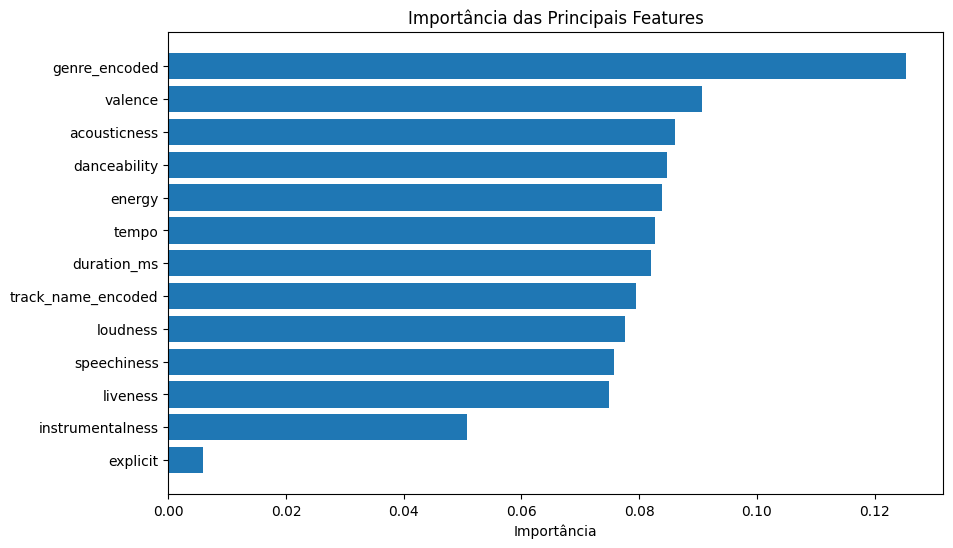

In [31]:
# Verifica a importância das features do modelo treinado
importances = rf.feature_importances_

# Lista dos nomes das features
feature_names = [
'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                             'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
                             'track_name_encoded', 'explicit', 'genre_encoded']

# Cria um df para organizar as importâncias das features
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordena as features pela importância
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Exibe as principais features
print("Principais Features:")
print(feature_importances.head(15))

# Visualiza as importâncias das features
plt.figure(figsize=(10, 6))
plt.title('Importância das Principais Features')
plt.barh(feature_importances['Feature'].head(15), feature_importances['Importance'].head(15))
plt.gca().invert_yaxis()  # Inverte o eixo y para que a feature mais importante apareça no topo
plt.xlabel('Importância')
plt.show()

## Tuning de Hiperparâmetros

Nesta parte, é aplicado um tuning com o hiperparâmetro `RandomizedSearchCV`, normalmente utilizado para encontrar as melhores combinações de parâmetros de um modelo de ML.

In [32]:
# Define a grade de hiperparâmetros a serem testados
param_distributions = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Inicializa o modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Aplica o RandomizedSearchCV com 5 folds (validação cruzada)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

# Treina o modelo com Randomized Search
random_search.fit(X_train, y_train)

# Exibe os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", random_search.best_params_)

# Avalia o modelo com os melhores hiperparâmetros
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Avalia o desempenho do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.3s
Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Acurácia: 0.7952181709503885
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76      3915
           1       0.77      0.87      0.82      4450

   

## Validação no CSV de teste

Por fim, é feito treinamento para o modelo validar os valores no arquivo `test.csv`.

In [33]:
# Seleciona as features e o alvo (target)
X = train_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
                'track_name_encoded', 'explicit', 'genre_encoded']]
y = train_data['popularity_target']

# Imputação de valores faltantes e padronização dos dados de treino
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Divide os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treina o modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Avalia o modelo com os dados de validação
y_pred_val = rf.predict(X_val)
print("Acurácia (validação):", accuracy_score(y_val, y_pred_val))
print("Relatório de Classificação (validação):\n", classification_report(y_val, y_pred_val))

# Seleciona as features do test_data (sem a variável alvo)
X_test_data = test_data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
                         'track_name_encoded', 'explicit', 'genre_encoded']]

# Usa o mesmo imputador e escalador que foram treinados
X_test_imputed = imputer.transform(X_test_data)
X_test_scaled = scaler.transform(X_test_imputed)

# Faz as previsões no test_data
test_data['popularity_prediction'] = rf.predict(X_test_scaled)

# Exibe as primeiras linhas do DataFrame para confirmar que a coluna foi adicionada
print(test_data[['track_unique_id', 'popularity_prediction']].head())


Acurácia (validação): 0.7949790794979079
Relatório de Classificação (validação):
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      3915
           1       0.78      0.86      0.82      4450

    accuracy                           0.79      8365
   macro avg       0.80      0.79      0.79      8365
weighted avg       0.80      0.79      0.79      8365

   track_unique_id  popularity_prediction
0              862                      1
1              101                      1
2              274                      1
3              110                      1
4              572                      0


## Criação do novo CSV

Aqui os resultados são salvos em um novo CSV

In [34]:
# Salva essas previsões em um outro arquivo CSV utilizando o `test.csv`
test_data[['track_unique_id', 'popularity_prediction']].to_csv('test_predictions_1.csv', index=False)